# Telecom Churn - ML Group Case Study
#### Pramod Kumar, Harsha Vardhan Siginam



In [19]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [20]:
data = pd.read_csv('telecom_churn_data.csv')
data.shape

(99999, 226)

In [21]:
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  \
0     7000842753        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  197.385  214.816  213.803   21.100          NaN          NaN         0.00          NaN           NaN           NaN          0.00           NaN            NaN            NaN           0.00            NaN            NaN            NaN           0.00            NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN           NaN           NaN          0.00           NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN   
1     7001865778        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014   34.047  355.074  268.321   86.285        24.11        78.68         7.68        18.34         15.74         99.84        304.76         53.76            0.0           0.00           0.00           0.00            0.0           0.00           0.00           0.00             23.88             74.56              7.68             18.34             11.51             75.94            291.86             53.76              0.00              0.00              0.00              0.00               0.0              2.91              0.00              0.00         35.39        150.51        299.54         72.11              0.23              4.11              0.00              0.00              0.00              0.46              0.13              0.00              0.00              0.00              0.00               0.0   
2     7001625959        109             0.0             0.0             0.0            6/30/2014            7/31/2014            8/31/2014            9/30/2014  167.690  189.058  210.226  290.714        11.54        55.24        37.26        74.81        143.33        220.59        208.36        118.91            0.0           0.00           0.00          38.49            0.0           0.00           0.00          70.94              7.19             28.74             13.58             14.39             29.34             16.86             38.46             28.16             24.11             21.79             15.61             22.24               0.0            135.54             45.76              0.48         60.66         67.41         67.66         64.81              4.34             26.49             22.58              8.76             41.81             67.41             75.53              9.28              1.48             14.76             22.83               0.0   
3     7001204172        109             0.0            

## Data Cleaning

### 1.Filling in predictable columns

In [22]:
#Finding columns with null values
null_columns = []
for column in data.columns:
    if data[column].isna().sum()>0:
        null_columns.append(column)
null_columns

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',

In [23]:
# all columns with mou in title are 'MINUTES OF USAGE'. NaN can be replaced with 0's
#Finding all columns with mou in title
mou_columns = []
for column in data.columns:
    if "mou" in column:
        mou_columns.append(column)
data[mou_columns]

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2t_mou_9  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2m_mou_9  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_t2c_mou_9  std_og_mou_6  std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  \
0                 0.0             0.0             0.0          NaN          NaN         0.00          NaN           NaN           NaN          0.00           NaN            NaN            NaN           0.00            NaN            NaN            NaN           0.00            NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN           NaN           NaN          0.00           NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN              0.00               NaN               NaN               NaN               0.0               NaN           NaN           NaN          0.00           NaN           NaN           NaN   
1                 0.0             0.0             0.0        24.11        78.68         7.68        18.34         15.74         99.84        304.76         53.76           0.00           0.00           0.00           0.00           0.00           0.00           0.00           0.00             23.88             74.56              7.68             18.34             11.51             75.94            291.86             53.76              0.00              0.00              0.00              0.00              0.00              2.91              0.00              0.00         35.39        150.51        299.54         72.11              0.23              4.11              0.00              0.00              0.00              0.46              0.13              0.00              0.00              0.00              0.00              0.00               0.0               0.0               0.0               0.0          0.23          4.58          0.13          0.00          0.00          0.00   
2                 0.0             0.0             0.0        11.54        55.24        37.26        74.81        143.33        220.59        208.36        118.91           0.00           0.00           0.00          38.49           0.00           0.00           0.00          70.94              7.19             28.74             13.58             14.39             29.34             16.86             38.46             28.16             24.11             21.79             15.61             22.24              0.00            135.54             45.76              0.48         60.66         67.41         67.66         64.81              4.34             26.49             22.58              8.76             41.81             67.41             75.53              9.28              1.48             14.76             22.83              0.00               0.0               0.0               0.0               0.0         47.64        108.68        120.94         18.04          0.00          0.00   
3  

In [24]:
#Filling columns with 0's
for column in mou_columns:
    data[column] = data[column].fillna(0)

In [25]:
#Remaining null columns
null_columns = []
for column in data.columns:
    if data[column].isna().sum()>0:
        null_columns.append(column)
null_columns

['last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'og_others_9',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'ic_others_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck

In [26]:
#Handling date columns
#Finding all columns with date in column name
date_columns = []
for column in data.columns:
    if "date" in column:
        date_columns.append(column)
date_columns

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [27]:
#last date of month is the same throughout the column
# filling in these values
data['last_date_of_month_6'] = data['last_date_of_month_6'][0]
data['last_date_of_month_7'] = data['last_date_of_month_7'][0]
data['last_date_of_month_8'] = data['last_date_of_month_8'][0]
data['last_date_of_month_9'] = data['last_date_of_month_9'][0]


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [29]:
data.select_dtypes(include=['object'])

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8 last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6 date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9
0                6/30/2014            7/31/2014            8/31/2014            9/30/2014           6/21/2014           7/16/2014            8/8/2014           9/28/2014                6/21/2014                7/16/2014                 8/8/2014                      NaN
1                6/30/2014            7/31/2014            8/31/2014            9/30/2014           6/29/2014           7/31/2014           8/28/2014           9/30/2014                      NaN                7/25/2014                8/10/2014                      NaN
2                6/30/2014            7/31/2014            8/31/2014            9/30/2014           6/17/2014           7/24/2014           8/14/2014           9/29/2014                      NaN                      NaN                      NaN                9/17/2014
3                6/30/2014            7/31/2014            8/31/2014            9/30/2014           6/28/2014           7/31/2014           8/31/2014           9/30/2014                      NaN                      NaN                      NaN                      NaN
4                6/30/2014            7/31/2014            8/31/2014            9/30/2014           6/26/2014           7/28/2014            8/9/2014           9/28/2014                 6/4/2014                      NaN                      NaN                      NaN
5                6/30/2014            7/31/2014            8/31/2014            9/30/2014           6/19/2014           7/17/2014           8/24/2014           9/28/2014                      NaN                      NaN                      NaN                      NaN
6                6/30/2014            7/31/2014            8/31/2014            9/30/2014           6/28/2014           7/31/2014           8/28/2014           9/28/2014                      NaN                      NaN                      NaN                      NaN
7                6/30/2014            7/31/2014            8/31/2014            9/30/2014           6/27/2014           7/25/2014           8/26/2014           9/30/2014                      NaN                      NaN                      NaN                      NaN
8                6/30/2014            7/31/2014            8/31/2014            9/30/2014           6/25/2014           7/31/2014           8/30/2014           9/30/2014                      NaN                7/31/2014                8/23/2014                      NaN
9                6/30/2014            7/31/2014            8/31/2014            9/30/2014           6/29/2014           7/23/2014           8/29/2014           9/20/2014                      NaN                7/23/2014                      NaN                      NaN
10               6/30/2014            7/31/2014            8/31/2014            9/30/2014           6/14/2014            7/5/2014           8/27/2014            9/6/2014                      NaN                      NaN                8/24/2014                 9/1/2014
11               6/30/2014            7/31/2014            8/31/2014            9/30/2014           6/18/2014           7/10/2014           8/21/2014                 NaN                      NaN                      NaN                8/21/2014                      NaN
12               6/30/2014            7/31/2014            8/31/2014            9/30/2014           6/26/2014           7/17/2014           8/10/2014           9/21/2014                      NaN                      NaN                      NaN                      NaN
13               6/30/2014            7/31/2014            8/31/2014            9/30/2014           6/20/2014           7/22/2014           8/30/2014           9/26/2014                      NaN                      NaN       

In [30]:
# Converting all the date columns to float type

for column in date_columns:
    data[column] = data[column].str.split("/", n=2, expand=True)[1].astype('float64')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(191), int64(35)
memory usage: 172.4 MB


### 2.Creating new columns for total amount recharged in each month

In [32]:
#Creating columns for total amount recharged in each month
#Filling in 0's for NaNs in columns representing count of recharges and recharge amounts
zero_fill_columns = ['total_rech_amt_6','av_rech_amt_data_6','total_rech_data_6']
zero_fill_columns.append(['total_rech_amt_7','av_rech_amt_data_7','total_rech_data_7'])
zero_fill_columns.append(['total_rech_amt_8','av_rech_amt_data_8','total_rech_data_8'])
zero_fill_columns.append(['total_rech_amt_9','av_rech_amt_data_9','total_rech_data_9'])

for column in zero_fill_columns:
    data[column] = data[column].fillna(0)

In [33]:
#Adding recharge amount + (avg data recharge amount*no. of data recharges(2g+3g))
data['final_rech_6'] = data['total_rech_amt_6'] + (data['av_rech_amt_data_6'] * (data['total_rech_data_6']))
data['final_rech_7'] = data['total_rech_amt_7'] + (data['av_rech_amt_data_7'] * (data['total_rech_data_7']))
data['final_rech_8'] = data['total_rech_amt_8'] + (data['av_rech_amt_data_8'] * (data['total_rech_data_8']))
data['final_rech_9'] = data['total_rech_amt_9'] + (data['av_rech_amt_data_9'] * (data['total_rech_data_9']))

data.shape

(99999, 230)

In [34]:
#Dropping columns used to derive new columns
drop_columns = ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']
drop_columns
data = data.drop(columns = drop_columns)
data.shape

(99999, 214)

### 3.Handling Non-Numeric (Category) columns

In [35]:
#List of non numeric columns
category_cols = ["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", 
"night_pck_user_9", "fb_user_6", "fb_user_7", "fb_user_8", "fb_user_9"]
for column in category_cols:
    data[column] = data[column].fillna(-1)

In [36]:
#Dummy Variable creation
#Dropping first dummy column
night6 = pd.get_dummies(data['night_pck_user_6'],prefix="night6",drop_first=True)
night7 = pd.get_dummies(data['night_pck_user_7'],prefix="night7",drop_first=True)
night8 = pd.get_dummies(data['night_pck_user_8'],prefix="night8",drop_first=True)

fb6 = pd.get_dummies(data['fb_user_6'],prefix="fb6", drop_first=True)
fb7 = pd.get_dummies(data['fb_user_7'],prefix="fb7",drop_first=True)
fb8 = pd.get_dummies(data['fb_user_8'],prefix="fb8",drop_first=True)

data = pd.concat([data,night6],axis=1)
data = pd.concat([data,night7],axis=1)
data = pd.concat([data,night8],axis=1)

data = pd.concat([data,fb6],axis=1)
data = pd.concat([data,fb7],axis=1)
data = pd.concat([data,fb8],axis=1)

data.shape

(99999, 226)

In [37]:
data = data.drop(columns=['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8'])
data.shape

(99999, 220)

In [38]:
#Drop all columns with greater than 50% NaNs
drop_columns = []
for column in data.columns:
    per = data[column].isna().sum()/99999*100
    if per>50:
        drop_columns.append(column);

In [39]:
data = data.drop(columns = drop_columns)
data.shape

(99999, 196)

In [40]:
#Finding columns with null values
null_columns = []
for column in data.columns:
    if data[column].isna().sum()>0:
        null_columns.append(column)
null_columns

['og_others_6',
 'og_others_7',
 'og_others_8',
 'og_others_9',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'ic_others_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [41]:
for column in null_columns:
    data[column] = data[column].fillna(0)

### Filtering High Value customers

In [42]:
#High value customers : avg spend in month 6&7 greater than 70percentile
percentile70 = np.percentile((data['final_rech_6']+data['final_rech_7'])/2,70)
percentile70

478.0

In [43]:
data = data[(data['final_rech_6'])>=percentile70]
data.shape

(29892, 196)

### Tagging churners

In [44]:
usage9 = data['total_ic_mou_9'] +  data['total_og_mou_9'] +  data['vol_2g_mb_9'] +  data['vol_3g_mb_9']
usage9

0           0.00
6        2638.40
7           0.00
13       1077.95
16        590.30
17        718.21
21       1284.14
33       5734.89
41        254.97
47        961.15
48       3213.82
53       1184.49
56       1325.93
57       5701.29
61        708.57
67          0.00
69        674.89
73       1879.62
86          0.00
87       1394.60
92       1544.04
96       1247.37
101      1015.95
102       455.09
103      2877.10
104       858.89
105      1646.89
111         0.00
115      2539.90
122       315.92
124       435.50
131       903.38
133      1831.40
134      1082.52
143         0.00
147      1305.09
149      1417.87
154      2520.60
157      2751.40
158      3532.21
170      2218.41
173      2615.44
175       914.62
176       829.08
177      1904.30
184       614.87
188         0.00
191        70.01
204      2744.19
206      1549.45
208      2459.21
210      1010.47
212      1458.66
213      2642.73
218      2197.35
225       994.43
226      1426.19
241      2451.24
242       803.

In [45]:
#replacing all non zero's with 0's
usage9[usage9 >0] = 1

#interchanging 1's and 0's to better represent churn data
usage9 = abs(usage9-1)
usage9

0        1.0
6        0.0
7        1.0
13       0.0
16       0.0
17       0.0
21       0.0
33       0.0
41       0.0
47       0.0
48       0.0
53       0.0
56       0.0
57       0.0
61       0.0
67       1.0
69       0.0
73       0.0
86       1.0
87       0.0
92       0.0
96       0.0
101      0.0
102      0.0
103      0.0
104      0.0
105      0.0
111      1.0
115      0.0
122      0.0
124      0.0
131      0.0
133      0.0
134      0.0
143      1.0
147      0.0
149      0.0
154      0.0
157      0.0
158      0.0
170      0.0
173      0.0
175      0.0
176      0.0
177      0.0
184      0.0
188      1.0
191      0.0
204      0.0
206      0.0
208      0.0
210      0.0
212      0.0
213      0.0
218      0.0
225      0.0
226      0.0
241      0.0
242      0.0
244      0.0
246      0.0
253      0.0
255      0.0
256      0.0
265      0.0
266      0.0
267      1.0
278      0.0
281      0.0
283      0.0
284      0.0
285      0.0
290      0.0
292      0.0
294      0.0
295      0.0
301      0.0

In [46]:
data['churn_tag'] = usage9

In [47]:
data['churn_tag']

0        1.0
6        0.0
7        1.0
13       0.0
16       0.0
17       0.0
21       0.0
33       0.0
41       0.0
47       0.0
48       0.0
53       0.0
56       0.0
57       0.0
61       0.0
67       1.0
69       0.0
73       0.0
86       1.0
87       0.0
92       0.0
96       0.0
101      0.0
102      0.0
103      0.0
104      0.0
105      0.0
111      1.0
115      0.0
122      0.0
124      0.0
131      0.0
133      0.0
134      0.0
143      1.0
147      0.0
149      0.0
154      0.0
157      0.0
158      0.0
170      0.0
173      0.0
175      0.0
176      0.0
177      0.0
184      0.0
188      1.0
191      0.0
204      0.0
206      0.0
208      0.0
210      0.0
212      0.0
213      0.0
218      0.0
225      0.0
226      0.0
241      0.0
242      0.0
244      0.0
246      0.0
253      0.0
255      0.0
256      0.0
265      0.0
266      0.0
267      1.0
278      0.0
281      0.0
283      0.0
284      0.0
285      0.0
290      0.0
292      0.0
294      0.0
295      0.0
301      0.0

In [48]:
#Remove all columns that represent month 9(as churn data is enough)
columns9 = []
for column in data.columns:
    if "9" in column:
        columns9.append(column)
columns9

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'final_rech_9']

In [49]:
data = data.drop(columns = columns9)

In [50]:
data.shape

(29892, 152)

## Modelling

In [51]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = data.drop(['churn_tag','mobile_number'],axis=1)

# Putting response variable to y
y = data['churn_tag']

y.head()

0     1.0
6     0.0
7     1.0
13    0.0
16    0.0
Name: churn_tag, dtype: float64

In [52]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)
from sklearn import preprocessing
X_scaler = preprocessing.StandardScaler().fit(X_train)
y_scaler = preprocessing.StandardScaler().fit(y_train.values.reshape(-1,1))

Xtrain=X_scaler.transform(X_train) 
Xtest=X_scaler.transform(X_test) 


C:\Users\PramodPC\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\PramodPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\PramodPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [53]:
Xtrain.shape

(20924, 150)

In [54]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [55]:
#Doing the PCA on the train data
pca.fit(Xtrain)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [56]:
pca.components_

array([[-3.42981867e-17, -1.66533454e-16,  1.11022302e-16, ...,
        -8.31370239e-02,  4.38748120e-02, -7.23401857e-02],
       [ 5.92696556e-17, -0.00000000e+00,  1.94289029e-16, ...,
         1.50083583e-01, -3.69052085e-02,  1.49391955e-01],
       [-7.01968994e-17,  1.11022302e-16,  6.66133815e-16, ...,
         1.53279274e-01, -6.54926494e-03,  1.53907458e-01],
       ...,
       [ 0.00000000e+00,  1.14872669e-03, -6.84777842e-01, ...,
        -8.13942687e-02, -4.09341221e-02, -9.12296218e-02],
       [ 0.00000000e+00,  2.98298878e-01, -4.73562666e-02, ...,
        -1.67458513e-01,  1.08632687e-01,  2.42108989e-01],
       [-1.00000000e+00, -1.31838836e-22,  4.75129377e-24, ...,
         3.09451226e-16,  5.43496784e-16,  1.91133760e-16]])

In [57]:
pca.explained_variance_ratio_

array([1.01888484e-01, 8.30108904e-02, 5.76380249e-02, 4.33975590e-02,
       4.11928741e-02, 3.18338749e-02, 2.76746595e-02, 2.60792174e-02,
       2.47361303e-02, 2.45807024e-02, 2.22547435e-02, 2.03691530e-02,
       1.96967586e-02, 1.89656354e-02, 1.73101937e-02, 1.70855095e-02,
       1.63201337e-02, 1.47107117e-02, 1.44853906e-02, 1.42939022e-02,
       1.28958647e-02, 1.26643343e-02, 1.14304192e-02, 1.12580648e-02,
       1.03132595e-02, 1.00045129e-02, 9.46901371e-03, 9.33775152e-03,
       9.27950032e-03, 8.67544618e-03, 8.24139344e-03, 8.03426919e-03,
       7.35951921e-03, 7.20634824e-03, 7.07083884e-03, 6.84214264e-03,
       6.59036313e-03, 6.39991403e-03, 6.21023407e-03, 6.10973917e-03,
       5.99368922e-03, 5.90087050e-03, 5.77958348e-03, 5.55422059e-03,
       5.53537152e-03, 5.44593995e-03, 5.22350348e-03, 4.91803508e-03,
       4.78718536e-03, 4.63396111e-03, 4.51427539e-03, 4.46968772e-03,
       4.36561210e-03, 4.32348134e-03, 4.23998511e-03, 4.06749633e-03,
      

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

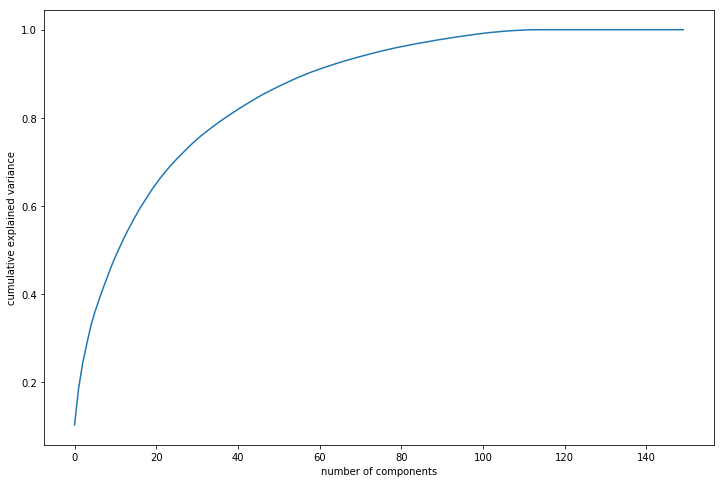

In [59]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [60]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=60)

In [61]:
df_train_pca = pca_final.fit_transform(Xtrain)
df_train_pca.shape

(20924, 60)

In [62]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

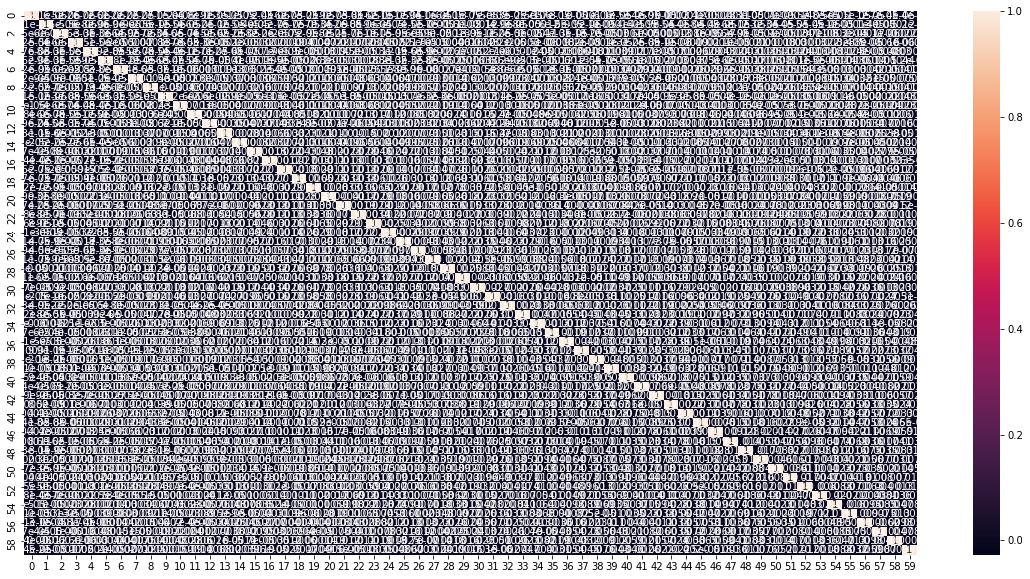

In [63]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [64]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.02847405566575539 , min corr:  -0.027313439728846603


In [65]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(Xtest)
df_test_pca.shape

(8968, 60)

In [66]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

C:\Users\PramodPC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### PCA + Logistic Regression Accuracy

In [67]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.91'

In [68]:
predictions = learner_pca.predict(df_test_pca)

In [69]:
from sklearn.metrics import confusion_matrix
co_ma = confusion_matrix(y_test,predictions)
co_ma

array([[7858,  171],
       [ 564,  375]], dtype=int64)

In [70]:
#Finding data imbalance
data['churn_tag'].sum()/data['churn_tag'].shape[0]*100

10.5011374280744

#### Data is imbalanced, as 10.5% of data is churn, and rest isn't
#### Finding the sensitivity & specificity:

In [53]:
#sensitivity
co_ma[0][0]/(co_ma[0][0]+co_ma[1][0])*100

93.3032533839943

In [54]:
#specificity
co_ma[1][1]/(co_ma[0][1]+co_ma[1][1])*100

68.68131868131869

### Model 2: Using Decision Tree

In [71]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

# Putting features
features = list(X_train.columns[0:])
features

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7'

In [72]:

# GridSearchCV to find optimal min_samples_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [73]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.935289619575607
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [74]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

#### Decision Tree Accuracy

In [75]:
# accuracy score
clf_gini.score(X_test,y_test)

0.9351025869759143

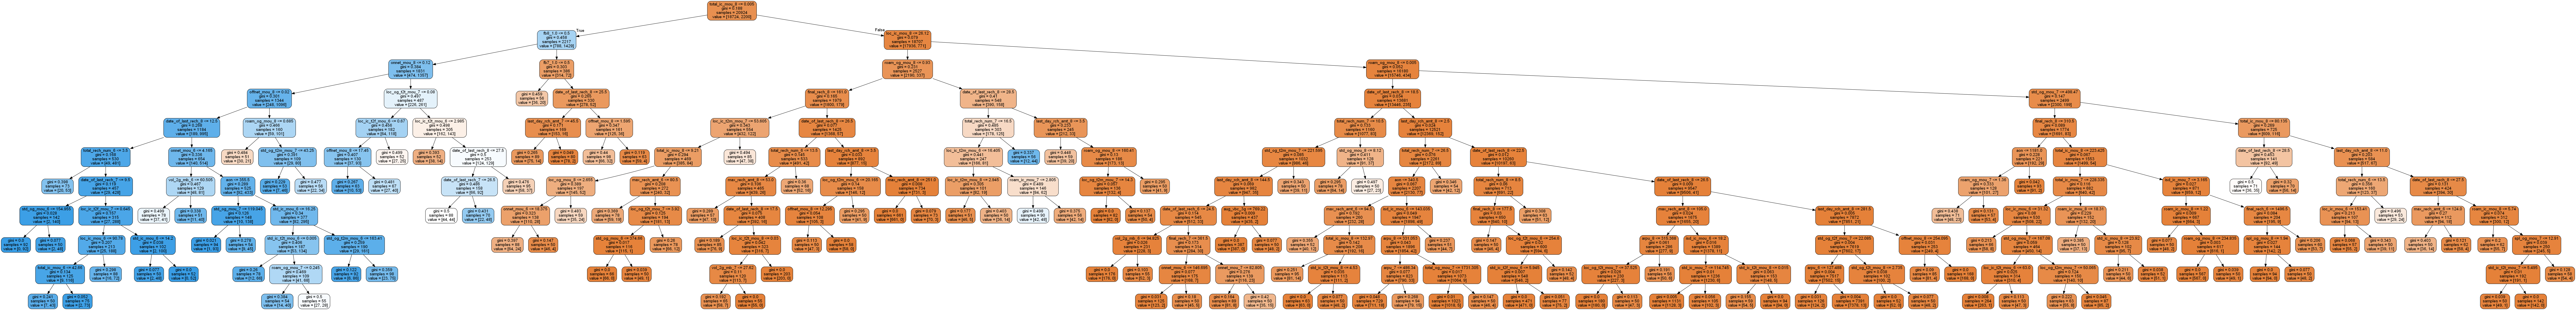

In [76]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Most influential features obtained

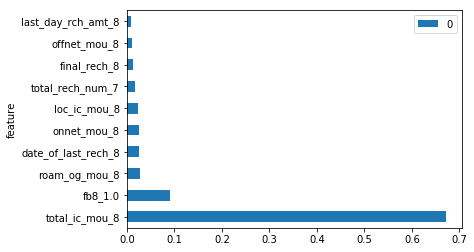

In [77]:
ifp = pd.DataFrame(clf_gini.feature_importances_)
ifp["feature"] = X_train.columns
ifp.set_index('feature', inplace=True)
ifp.nlargest(10,0).plot(kind='barh')
plt.show()

In [78]:
# List of most influential features
ifp.nlargest(10,0)

0
feature                      
total_ic_mou_8       0.670969
fb8_1.0              0.089892
roam_og_mou_8        0.027044
date_of_last_rech_8  0.026324
onnet_mou_8          0.025609
loc_ic_mou_8         0.022742
total_rech_num_7     0.016706
final_rech_8         0.013735
offnet_mou_8         0.010063
last_day_rch_amt_8   0.008945

# Observations

### Recommendations based on the above observations:
#### 1) Offer the high value customers free incoming calls
#### 2) Offer them no roaming charges 
#### 3) Offer them facebook specific plans (such as unlimited data on facebook) , as high value customers seem to be more into using facebook
#### 4) Offer free calls for customers within the same network
#### 5) Offer low calling rate for customers in different network